<h1><center>
    ECE 438: Digital Signal Processing with Applications<br/>
    Lab 3: Frequency Analysis<br/>
    <small>Date:</small><br/>
    <small>Section:</small><br>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 [Ruixiang Wang]| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Ability to compute Fourier series expansion and synthesize periodic signals using the expansion in Simulink (26 pts)**: *Derivation and sketch, plots of synthesized signals, questions*||||
|**Understanding of modulator and CT system analysis (26 pts)**: *Output plots, questions*||||
|**Implementation of DTFT (21 pts)**: *Python function, DTFT’s magnitude and phase plots*||||
|**DT system analysis (27 pts)**: *Exercises in 5.2, completed block diagram, table of measurements, impulse and frequency response*||||

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 2.1</left></h3>

**1. For each of these two signals, do the following on a blank sheet of paper (or type the equations in the Markdown cell if you are familiar with LaTex):**
* **Compute the Fourier series expansion in the form**
\begin{equation}
    s(t)=a_0+\sum_{k=1}^\infty A_k\sin(2\pi kf_0t+\theta_k)
\end{equation}
where $f_0=\frac{1}{T_0}$.

    **Hint :**You may want to use one of the following references:

    Sec. 4.1 of “Digital Signal Processing”, by Proakis and Manolakis, 1996;

    Sec. 4.2 of “Signals and Systems”, by A. Oppenheim and A. Willsky, 1983;

    Sec. 3.3 of “Signals and Systems”, A. Oppenheim and A. Willsky, 1997.

    Note that in the expression above, the function in the summation is $\sin(2\pi kf_0 t + \theta k )$, rather than a complex sinusoid. The formulas in the above references must be modified to accommodate this. You can compute the cos/sin version of the Fourier series, then convert the coefficients.

(1)

<img src="WeChat Image_20230131175144.jpg">

(2) Note: a0 is 0, there is a mistake here

<img src="WeChat Image_20230131175157.jpg">

<img src="WeChat Image_20230131175205.jpg">

**2. Write code to approximate the two signals using the Fourier series expansion above. Use 200 (instead of infinite number of) Sine waves. Then, plot these two signals.**

<StemContainer object of 3 artists>

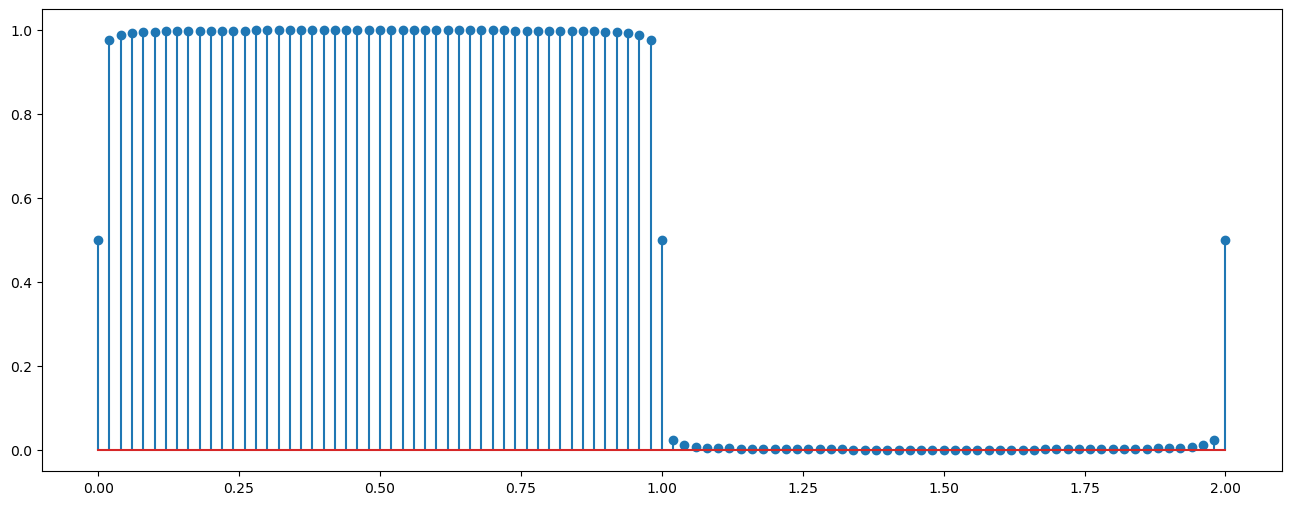

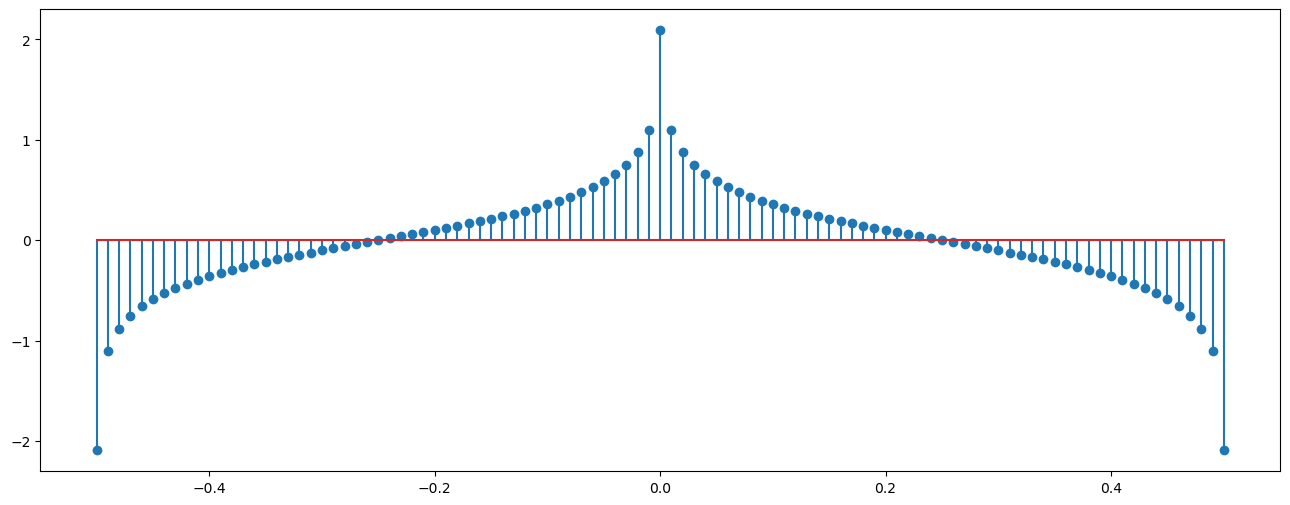

In [17]:
import math
t1 = np.linspace(0, 2, 101)
t2 = np.linspace(-0.5, 0.5, 101)

s1 = 0.5 + sum(2/(k*math.pi) * np.sin(k*math.pi*t1) for k in range(1, 200, 2))
s2 = sum(2/(k*math.pi) * np.cos(k*2*math.pi*t2) for k in range(1, 200, 2))

plt.figure(1)
plt.stem(t1, s1)

plt.figure(2)
plt.stem(t2, s2)

<h3 style="color:red;"><left>Exercise 4.1</left></h3>

**1. Hand in plots of the Spectrum Analyzer output for each of the three synthesized waveforms.** 

(1)

<img src="x1.1.png">

<img src="x1.2.png">

<img src="x1.3.png">

(2)

<img src="x2.1.png">

<img src="x2.2.png">

<img src="x2.3.png">

**2. For each case in Q1, comment on how the synthesized waveform differs from the desired signal,and on the structure of the spectral density.**

For signal (1), the result is similar to its original signal.
For signal (2), the result does not describe original signal very well

<h3 style="color:red;"><left>Exercise 4.2</left></h3>

**1. Hand in plots of the output of the *Spectrum Analyzer* for each signal.**

<img src="4.2.1.png">

<img src="4.2.2.png">

<img src="4.2.3.png">

<img src="4.2.4.png">

**2. What effect does changing the modulating frequency have on the spectral density?**

the spectral density follow the modulating frequency and center at that value.

**3. Why does the spectrum have a comb structure and what is the spectral distance between impulses? Why?**

Because in time domain it has rep structure for our triangle signal. The distance is 0.5 for period of 2 because it is inverse of 2.

**4. What would happen to the spectral density if the period of the triangle pulse were to
increase toward infinity? (in the limit)**  

The distance between impulses will approach zero.

<h3 style="color:red;"><left>Exercise 4.3</left></h3>

**1. Hand in the printout of the output of the Network Analyzer (magnitude and phase of the
frequency response, and the impulse response).**

<img src="4.3.1.png">

**2. Hand in the plot of the impulse response obtained using a unit step.**

<img src="4.3.2.png">

**3. What are the advantages and disadvantages of each method?**

The first method gives more information regarding phase and magnitude, but the frequency response is distorted by a little. The second method is the opposite.

<h3 style="color:red;"><left>Exercise 5.1</left></h3>

**1. Complete the follwing function that computes the DTFT of a discrete-time signal.** 
```python
def DTFT(x,n0,w):
    """
    This function computes the DTFT of a discrete-time signal.
    
    Parameters
    ---
    x: the discrete-time signal
    n0: time index corresponding to the 1st element of the x vector
    w: frequencies
    
    Returns
    ---
    X: the computed DTFT
    """
    pass
```
**Note that if ```x``` is a vector of length $N$, then its DTFT is computed by**

\begin{equation}
    X(\omega)=\sum_{n=0}^{N-1}x[n]e^{-jw(n+n0)}
\end{equation}

**where $w$ is a vector that contains the frequencies from $-\pi$ to $\pi$.**

**Hint:** In Python, ```1j``` is defined as $\sqrt{-1}$. Use `np.exp(x)` to calculate $e^x$.

In [20]:
def DTFT(x,n0,w):
    X = sum(x[n]*np.exp(-1j*w*(n+n0)) for n in range(n0, len(x)-1, 1))
    return X

**2. For the following signals** 

* $x[n]=\delta[n]$
* $x[n]=\delta[n-5]$
* $x[n]=(0.5)^nu[n]$

**use your DTFT function to compute $X(\omega)$, and plots its magnitude and phase.**

**Hint**: Use `np.power(a,b)` to calculate $a^b$. Use ```np.abs()``` and ```np.angle()``` to compute the magnitude and phase.

ValueError: x and y must have same first dimension, but have shapes (51,) and (1,)

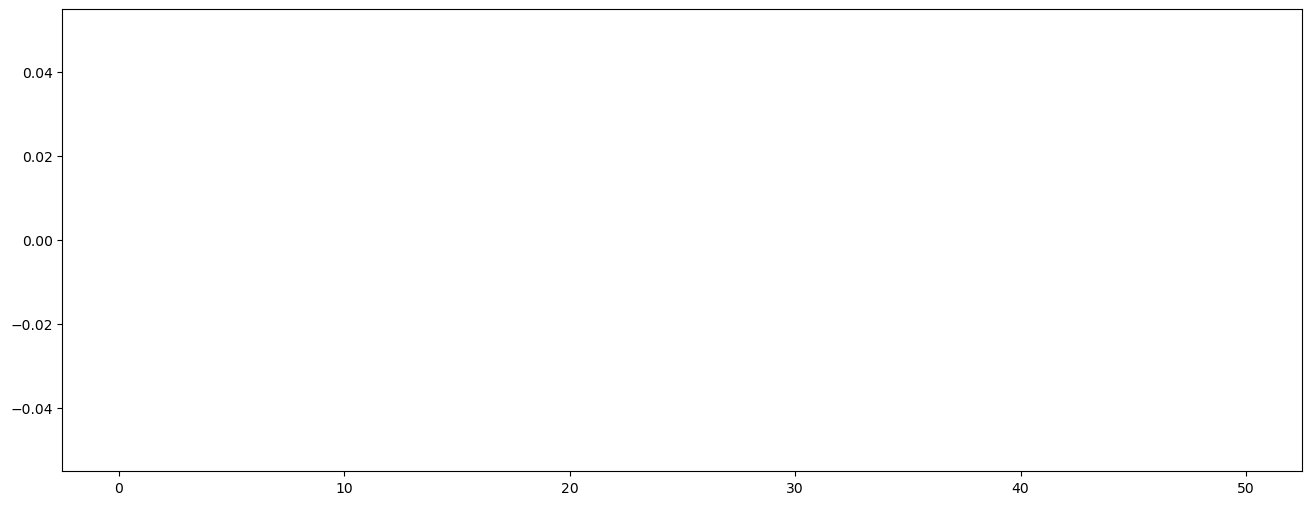

In [24]:
t = np.linspace(0, 50, 51)
x1 = [0]*50
x1[0] = 1
x1_mag = np.abs(DTFT(x1,0,2*math.pi))
x1_pha = np.angle(DTFT(x1,0,2*math.pi))

plt.figure(1)
plt.stem(t, x1_pha)

<h3 style="color:red;"><left>Exercise 5.2: Magnitude and Phase of the Frequency Response of a Discrete-Time Systems</left></h3>

Consider the discrete-time system described by the following difference equation:

\begin{equation}y[n]=0.9y[n-1]+0.3x[n]+0.24x[n-1]\end{equation}

Assume that the system is **causal**.

**1. Draw a system diagram.**

insert your diagram here

**2. Obtain the impulse response of the system by replacing $x[n]$ with $\delta[n]$ in the above equation. (Use causality to set up the initial conditions.)**

write your answer here

**3. Use your answer in Q2 to obtain the frequency response of the system.**

write your answer here

**4. Find the frequency response of the system using another method. Specifically, take the DTFT of the left-hand-side and right-hand-side of the difference equation, and then use linearity and the time-shifting property of the DTFT along with the fact that $H(\omega)=\frac{Y(\omega)}{X(\omega)}$**

write your answer here

**5. Write Python code to compute and plot the magnitude and phase responses, $|H(\omega)|$ and $\angle H(\omega)$, for $-\pi<\omega<\pi$.**

In [6]:
# write your code here


<h3 style="color:red;"><left>Exercise 5.3</left></h3>

**1. Insert the printout of your completed block diagram.**

<img src="Screenshot 2023-02-02 002419.jpg">

**2. Enter both the amplitude measurements you made and their theoretical values.**

| $\omega$ | Measurements | Theoretical Values |
|:--------:|:------------:|:------------------:|
| $\pi/16$ |       6       |                    |
|  $\pi/8$ |              |                    |
|  $\pi/4$ |              |                    |

**3. Plot the impulse response, and the magnitude and phase of the frequency response by using your DTFT function.**

In [7]:
# write your code here
